# Association Analysis - 연관 분석

## 공용 코드

In [1]:
# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)

## 동아일보의 데이터를 크롤링해서 단어 추천하기

In [18]:
from bs4 import BeautifulSoup
import requests
import urllib
import time


# 크롤링 할 문자열을 저장할 list
textlist = []

# 검색어 - 한글은 인코딩 필요
search = urllib.parse.quote('추석')

# 크롤링 할 URL 을 생성
target_url = 'https://www.donga.com/news/search?query=' + search + '&sorting=1&check_news=91&search_date=1&v1=&v2=&p='
# url 확인
#print(url)
# 인덱스인 p 파라미터를 활용하기 위해서 url 마지막에 'p='을 추가

# 10개씩 100개의 URL 읽기 - 1페이지에 15개씩 데이터가 있음
for n in range(1, 150, 5):
    url = target_url + str(n)
    try:
        # html 읽어오기
        response = requests.get(url)
        # 파싱 객체 생성
        soup = BeautifulSoup(response.text, 'html.parser')
        # 선택자를 통해 데이터(텍스트)를 가져올 부분 지정
        temp = soup.select('#content > div.sch_cont > div.schcont_wrap > div > div:nth-child(2) > div.rightList > span.txt > a')
        # 텍스트 가져오기
        for line in temp:
            #print(line.text)
            # 생성한 리스트에 텍스트 내용 저장
            textlist.append(line.text)
    except:
        print('예외 상황 발생')
    #print(response)
    #print(url)
    time.sleep(1) # 데이터를 잘 읽지 못하는 경우에 대비해서 0.5초 멈춤
    

In [19]:
print(textlist[:3])

['... 인기를 얻고 있는 주류다. 트랜스베버리지 관계자는 “추석 선물과 가족 모임, 여행까지 다양한 상황에서 합리적으로 즐길 수 있는 패키지 상품을 기획했다”며 “앞으로도 다양한 ...', '... 다양한 볼거리를 선보일 예정이다.10월 첫째 주의 경우 추석 연휴 및 중국 국경절 연휴 등을 고려해 서울에 방문한 국내외 관광객에게 볼거리 제공을 위해 드론 라이트 쇼가 두 번 ...', '... 있다”고 했다. 국제 유가가 급등세를 이어가면서 추석을 앞둔 국내 생활물가도 덩달아 들썩이고 있다. 중국 부동산발 위기 등으로 하반기 경기 반등 기대에 ‘빨간불’이 켜진 ...']


In [20]:
# 한글 데이터의 형태소 분석
from konlpy.tag import Okt

okt = Okt()

text = ''
# 형태소 분석에는 list 를 사용할 수 없음
# 형태소 분석기는 하나의 문장에만 적용 가능하므로 데이터를 한 문장으로 재구성
for line in textlist:
    text += line + '\n'

# 형태소 분석을 진행
ko_tokens = okt.morphs(text)
#print(ko_tokens)

In [21]:
# 형태소 분석 결과를 가지고 등장 횟수 확인
import nltk

ko = nltk.Text(ko_tokens, name = '추석')
print(ko) # <Text: 추석>
print(ko.vocab()) # 189개 samples에 대해 308개 outcomes
print(ko.vocab().most_common(20))

<Text: 추석>
<FreqDist with 626 samples and 1322 outcomes>
[('...', 59), ('을', 46), ('.', 41), ('추석', 30), ('\n', 29), ('를', 17), ('했다', 16), ('이', 16), ('”', 15), ('에', 15), ('“', 14), ('으로', 13), ('한', 13), (',', 12), ('등', 12), ('는', 11), ('연휴', 11), ('전', 11), ('가', 10), ('‘', 10)]


In [33]:
# 형태소 분석 결과에서 불필요한 부분 제거

# 불용어 처리
stop_words = ['...', '.', '\n', '‘', '’', '“', '”', ',', '으로', '에서',
             '했다', '이다', '부터', '까지', '한다', '이라고', '있는', '있다']
ko_tokens = [word for word in ko_tokens if word not in stop_words]
# 길이가 1인 조사 등을 처리
ko_tokens = [word for word in ko_tokens if len(word) > 1]

ko = nltk.Text(ko_tokens, name = '추석')
print(ko)
print(ko.vocab().most_common(20))

<Text: 추석>
[('추석', 30), ('연휴', 11), ('예정', 6), ('명절', 6), ('선물', 5), ('10월', 5), ('가격', 5), ('위해', 4), ('물가', 4), ('5일', 4), ('판매', 4), ('대금', 4), ('행사', 4), ('지급', 4), ('기간', 4), ('관계자', 3), ('다양한', 3), ('서울', 3), ('하반기', 3), ('협력', 3)]


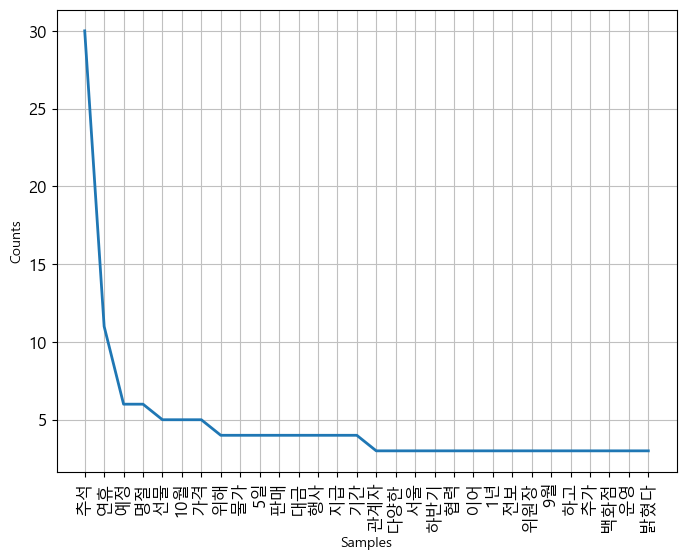

In [34]:
# 단어 별 등장 횟수 시각화

# 상위 30개 단어에 대해 등장 횟수 출력
plt.figure(figsize = (8, 6))
ko.plot(30)
plt.show()

In [36]:
# 워드 클라우드 생성

import pytagcloud

# 자주 등장하는 단어 추출 
data = ko.vocab().most_common(100)
# 단어와 등장 횟수를 가지고 크기와 색상을 결정
taglist = pytagcloud.make_tags(data, maxsize = 300)
#print(taglist)

# 클라우드 생성
pytagcloud.create_tag_image(taglist, 'wordcloud_추석.png', size = (800, 600),
                           fontname = 'HakgyoansimBombanghakR', rectangular = False)

In [39]:
# 연관 단어 추출

#!pip install gensim
from gensim.models import word2vec

lines = text
okt = Okt()
result = []

for line in lines:
    # 품사를 가져와서 조사, 어미, 구두점을 제고
    malist = okt.pos(line, norm = True, stem = True)
    r = []
    
    for word in malist:
        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
            r.append(word[0])
    
    r1 = (" ".join(r)).strip()
    result.append(r1)
    
    #print(r1)
        

In [41]:
# 형태소를 분석한 문장들을 파일에 저장한 후 Word2Vector 모델 생성

data_file = '추석.data'

with open(data_file, 'w', encoding = 'utf-8') as f:
    f.write('\n'.join(result))
    data = word2vec.LineSentence(data_file)
    
model = word2vec.Word2Vec(data, vector_size = 200, window = 10, 
                         hs = 1, min_count = 2, sg = 1)

# 모델을 저장
model.save('추석.model')
# 모델 불러오기
model = word2vec.Word2Vec.load('추석.model')

In [51]:
# 연관된 단어 추출
#'서다' 와 연관관계가 긍정적으로 높은 10개 단어 추출
# 반대로 negative 로 설정할 수도 있음
model.wv.most_similar(positive = ['서다'])

[('드', 0.235),
 ('유', 0.163),
 ('목', 0.133),
 ('상', 0.132),
 ('혜', 0.127),
 ('선', 0.119),
 ('예', 0.116),
 ('매', 0.114),
 ('획', 0.113),
 ('로', 0.113)]

## tweet_temp.csv 파일의 내용을 가지고 손흥민 연관 규칙 분석

In [52]:
# 데이터 가져오기
df = pd.read_csv('./data/tweet_temp.csv')
df.head()

,created,tweet_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...


In [54]:
# 데이터에서 한글만 추출
import re

def text_cleaning(text):
    # 한글의 정규 표현식
    hangle = re.compile('[^ ㄱ-ㅣ 가-힣]+')
    # 한글이 아닌 것은 전부 '' 로 치환 - 삭제
    result = hangle.sub('', text)
    
    return result

df['ko_text'] = df['tweet_text'].apply(lambda x : text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...


In [57]:
# 형태소 분석
from konlpy.tag import Okt
from collections import Counter

# 한국어 불용어 사전
# https://www.ranks.nl/stopwords/korean url 참고
korean_stop_words_path = './data/ko_stop_words.txt'
with open(korean_stop_words_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
#print(stopwords[:10])

# 형태소에서 불용어 제거
def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    nouns = [noun for noun in nouns if len(noun) > 1]
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

# 데이터에 적용
df['nouns'] = df['ko_text'].apply(lambda x : get_nouns(x))
df.head()


,created,tweet_text,ko_text,nouns
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,,[]
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스,"[트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...,"[손흥민, 말씀]"
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민,[손흥민]
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...,"[경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,..."


### 연관 규칙 분석 API 적용

In [58]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=0490f0611f36696191112fe44d620e4ef935d3cc0e3b50363089b2cc4a3ea67a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\84\45\a4\8ade6576f75410d8162c6da1de0aa9df56c16c711acab5a813
Successfully built apyori


In [59]:
# 거래 생성
# 찾고자 하는 관계 작성
transactions = [['손흥민', '케인'], ['손흥민', '시소코'],
               ['손흥민', '포체티노', '케인']]

from apyori import apriori

# 별다른 옵션 없이 연관 규칙 분석을 수행
results = list(apriori(transactions))

for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '시소코'}), confidence=0.3333333333333333, lift=1.0), Or

In [60]:
# 지지도 0.5 이상, 향상도 1.0 이상, 신뢰도 0.6 이상인 거래만 확인
results = list(apriori(transactions, min_support = 0.5,
                      min_lift = 1.0, min_confidence = 0.6, max_length = 2))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'손흥민', '케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민', '케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])


In [63]:
# 데이터 프레임의 데이터를 리스트로 전환

transactions = df['nouns'].tolist()
# 데이터가 있는 경우만 가져옴
transactions = [transaction for transaction in transactions if transaction]

results = list(apriori(transactions, min_support = 0.1,
                      min_lift = 5.0, min_confidence = 0.2, max_length = 2))
for result in results:
    #print(result)
    pass

In [69]:
# 결과가 보기 힘드므로 DataFrame 으로 변환
# 1개인 삼품은 제거

columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns = columns)

for result in results:
    if len(result.items) == 2:
        # 결과의 item 이름을 가져와서 list로 생성
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        # 데이터를 Series 로 변환
        series = pd.Series(row, index = network_df.columns)
        network_df = network_df.append(series, ignore_index = True)

#print(network_df.head())

C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3567116083.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3567116083.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3567116083.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = network_df.append(series, ignore_index = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6156\3567116083.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  network_df = net

### 네트워크 시각화

In [71]:
# 하나의 문장으로 만들기
tweet_corpus = ''.join(df['ko_text'].tolist())
#print(tweet_corpus)

In [73]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)

count = Counter(nouns)
#print(count)

# 글자수가 1글자인 경우를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)


Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '밤': 70, '선거운동': 70, '것': 70, '보고': 70, '내': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '글': 70, '중': 70, '추첨': 70, '통해': 70, '분': 70, '골드바': 70, '렌': 70, '통': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '입': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '애': 35, '뭐': 35, '말씀': 35, '알': 35, '거': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '안': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '급': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '요': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '렙': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '만': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '이': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '해': 35

In [75]:
# 등장한 단어를 node, 등장 횟수를 nodesize 로 해서 DataFrame 생성
node_df = pd.DataFrame(remove_char_counter.items(),
                       columns = ['node', 'nodesize'])
# 등장 횟수가 50 이상인 데이터만 가져오기
node_df = node_df[node_df['nodesize'] >= 50]
node_df.head()

,node,nodesize
2,축구,140
4,손흥민,560
5,선수,140
7,모델,105
10,한국,105


In [76]:
# 네트워크 시각화 패키지 설치
!pip install networkx

In [83]:
import networkx as nx

plt.figure(figsize = (8, 6))

# 그래프 인스턴스 생성
g = nx.Graph()

# 데이터를 순회하면서 node 생성
for index,row in node_df.iterrows():
    g.add_node(row['node'], nodesize = row['nodesize'])
    
# 노드 사이의 간선 만들기
for index, row in network_df.iterrows():
    # source 에서 target 방향으로 선을 그림
    # support 위치는 선의 두께
    g.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
pos = nx.spring_layout(g, k = 0.6, iterations = 50)
sizes = [g.nodes[node]['nodesize']*25 for node in g]
nx.draw(g, pos = pos, node_size = sizes)

# 한글이 있는 경우 폰트 설정
# Windows 는 Malgun Gothic
nx.draw_network_labels(G, pos = pos, font_family = 'Malgun Gothic',
                      fontsize = 20)

# 그래프 그리기
ax = plt.gca()
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 800x600 with 0 Axes>

## 컨텐츠 기반의 영화 추천 서비스

In [2]:
# 데이터 읽어오기
movies = pd.read_csv('./data/tmdb_5000_movies.csv')
print(movies.shape)
# (4803, 20) 4803 개 데이터와 20 개의 feature

(4803, 20)


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               